In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Sale Order History 09-09-2020.xlsx')

In [3]:
df.head()

,Name,Sale Org,plant,Territory,indent_no,So_No,SO_DATE,Sale Order Qty,Sale Order Amount,BILL_DATE,BILL_NO,Bill_Qty,Bill_Amt,Delivery_no,Status,Approval_date,Sale Order Pending Qty,Sale Order Pending Amount,Sale Order Cancel Qty,Sale Order Cancel Amount
0,Garg Medical Agency,1100,1001,Punjab,IND2021000003,3000002307,2020-07-01,NaN,NaN,2020-07-13,1.001102e+09,538,28158.0,8.000005e+09,PARTIAL SO CANCELLED,2020-07-09,NaN,NaN,NaN,NaN
1,Garg Medical Agency,1100,1001,Punjab,IND2021000003,3000002307,2020-07-01,1317.0,210906.0,2020-07-11,1.001102e+09,755,172572.0,8.000005e+09,PARTIAL SO CANCELLED,2020-07-09,NaN,NaN,24.0,10176.0
2,Partap Surgical,1100,1001,Punjab,IND2021000002,3000002308,2020-07-01,NaN,NaN,2020-07-11,1.001102e+09,106,17368.0,8.000005e+09,PARTIAL SO CANCELLED,2020-07-01,NaN,NaN,NaN,NaN
3,Partap Surgical,1100,1001,Punjab,IND2021000002,3000002308,2020-07-01,269.0,48091.0,2020-07-04,1.001102e+09,106,24708.0,8.000004e+09,PARTIAL SO CANCELLED,2020-07-01,NaN,NaN,57.0,6015.0
4,R.K. Medical Hall,1100,1001,Punjab,IND2021000005,3000002309,2020-07-01,201.0,47100.0,2020-07-09,1.001102e+09,201,47100.0,8.000005e+09,INVOICED,2020-07-07,0.0,0.0,NaN,NaN


In [4]:
sales = df[['SO_DATE','Bill_Amt']]

In [5]:
sales.dropna(inplace=True)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
sales.columns = ['Month','Sales']

In [7]:
sales.set_index('Month',inplace=True)

In [8]:
sales.size

7239

In [9]:
sales_mean = sales.resample('D').sum()

In [10]:
sales_mean.shape

(71, 1)

In [11]:
sales_mean.dropna(inplace=True)

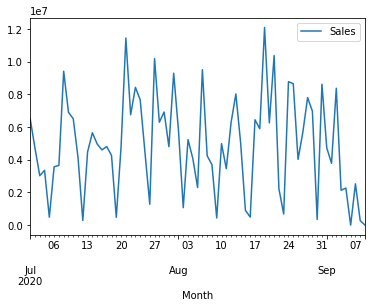

In [12]:
sales_mean.plot()

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

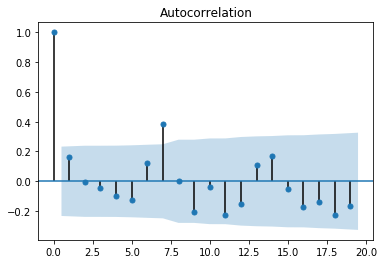

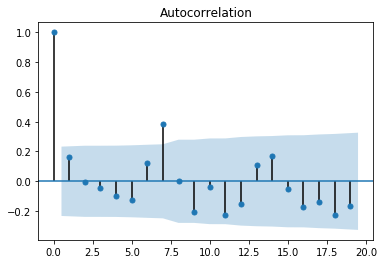

In [14]:
plot_acf(sales_mean['Sales'])

In [15]:
sales_diff = sales_mean.diff(periods=1)

In [16]:
sales_diff = sales_diff[1:]

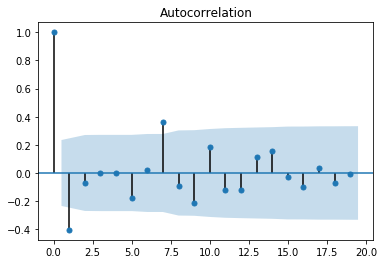

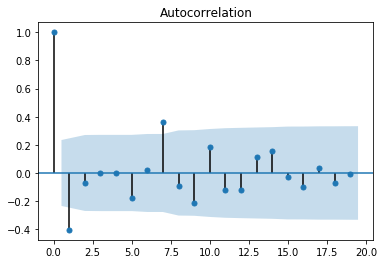

In [17]:
plot_acf(sales_diff)

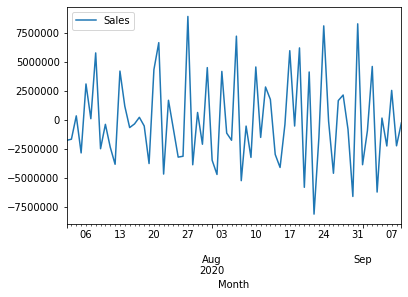

In [234]:
sales_diff.plot()

In [19]:
X = sales_mean.values

In [20]:
train = X[:55]
test = X[55:]

In [21]:
train.size

55

In [22]:
test.size

16

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
model_arima = ARIMA(train,order=(7,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1767.3367625807277


In [25]:
predictions = model_arima_fit.forecast(steps=15)[0]

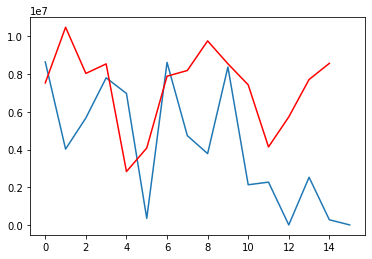

In [26]:
plt.plot(test)
plt.plot(predictions,'r')

In [27]:
import itertools
p=d=q=range(0,5)
pdq=itertools.product(p,d,q)

In [32]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=(param))
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1798.1699789843426
(0, 0, 1) 1799.1902143944715
(0, 0, 2) 1801.1374274076745
(0, 0, 3) 1801.2720524821411
(0, 0, 4) 1800.5697453071607
(0, 1, 0) 1795.7688605207184
(0, 1, 1) 1772.3664198799866
(0, 1, 2) 1772.9299194597033
(0, 1, 3) 1775.64902848386
(0, 1, 4) 1775.297116106116
(0, 2, 0) 1814.9624655903708
(0, 2, 1) 1777.213376268119
(0, 2, 2) 1751.6490784024145
(0, 2, 3) 1752.1346398550124
(0, 2, 4) 1768.4269895396205
(1, 0, 0) 1799.2940962361881
(1, 0, 1) 1801.1790794698986
(1, 0, 2) 1799.4278375320876
(1, 0, 3) 1800.936020220225
(1, 0, 4) 1801.2087535965652
(1, 1, 0) 1789.628232826925
(1, 1, 2) 1775.649826512019
(1, 1, 3) 1777.1040086211206
(1, 1, 4) 1777.0857303616435
(1, 2, 0) 1792.0589450836542
(1, 2, 1) 1764.1607692624968
(1, 2, 2) 1766.767126281134
(1, 2, 3) 1764.672391740181
(2, 0, 0) 1800.8888198065144
(2, 0, 1) 1799.1217033181354
(2, 0, 2) 1790.0702122220898
(2, 0, 3) 1803.7753070685892
(2, 0, 4) 1800.2257837478396
(2, 1, 0) 1789.2548062937553
(2, 1, 1) 1775.46808031

In [28]:
import statsmodels.api as sm

In [255]:
model = sm.tsa.statespace.SARIMAX(sales_mean['Sales'],order=(9,1,1),seasonal_order=(8,0,1,12))
result = model.fit()

F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


In [256]:
sales_mean['forecast'] = result.predict(start=55,end=70,dynamic=True)

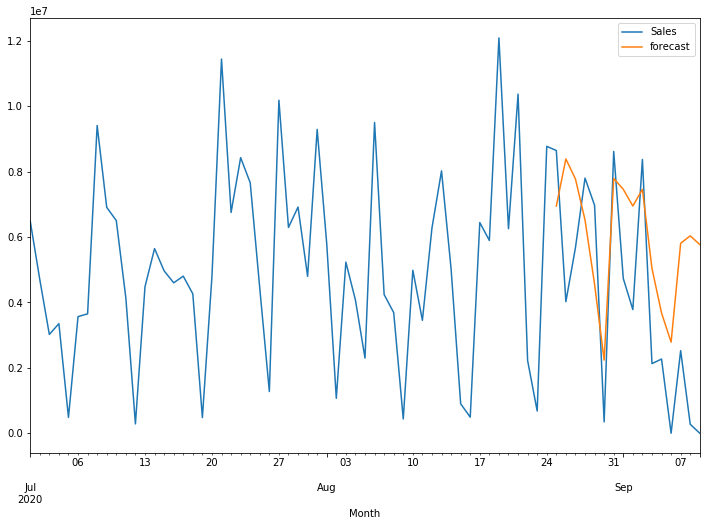

In [257]:
sales_mean[['Sales','forecast']].plot(figsize=(12,8))

In [258]:
from pandas.tseries.offsets import DateOffset

In [259]:
future_dates = [sales_mean.index[-1] + DateOffset(days=x) for x in range(0,60)]

In [260]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=sales_mean.columns)

In [261]:
future_df = pd.concat([sales_mean,future_dates_df])

In [262]:
future_df['forecast'] = result.predict(start=67,end=130,dynamic=True)

In [263]:
a = result.predict(start=67,end=130,dynamic=True)

In [264]:
a.shape

(64,)

In [265]:
future_df['forecast'].shape

(130,)

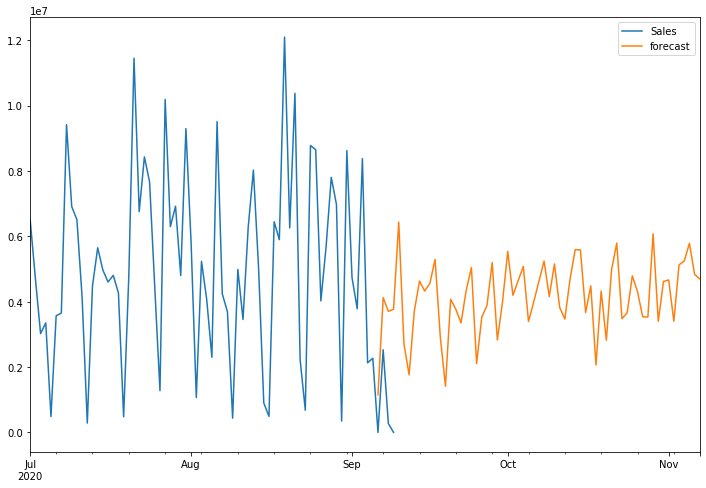

In [266]:
future_df[['Sales','forecast']].plot(figsize=(12,8))

In [267]:
X.sum()

348510641.86

In [268]:
a.sum()

265742865.8337806